# Problem Set : 

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

# Input and Output Features : 

Input: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

# Understanding the input features: 

1. Runs: (R) - It portrays number of times each particular player crosses the home plate. 
2. At Bats: (AB) - It portrays basically plate appearances. It doesn not include being hit by pitch, bases on balls, interference, sacrifices, or obstruction. 
3. Hits (H) - It means reaching the final base due to batted. 
4. Doubles: (2B) - It means hits on which the batter reaches second base safely. 
5. Triples: (3B) - It means hits on which the batter reaches third base safely.
6. Homeruns: (HR) - It means hits on which the batter successfully touched all four bases. 
7. Walks: (BB) - It portrays hitter not swinging at four pitches called out of the strike zone and awarded first base.
8. Strikeouts: (K) - It means number of times that a third strike is taken or swung at and missed, or bunted foul. 
9. Stolen Bases: (SB) - It means number of bases advanced by the runner while the ball is in the possession of the defense. 
10. Runs allowed (RA) 
11. Earned Runs (ER)
12. Earned run average (ERA)
13. Shutouts 
14. Saves
15. Complete Game and Errors 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats 
from scipy.stats import zscore 
import sklearn 
from sklearn.preprocessing import StandardScaler, LabelEncoder, power_transform 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
import warnings 
warnings.filterwarnings('ignore')

# Loading The Dataset: 

In [4]:
df = pd.read_csv('baseballdata.csv')

In [5]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Observation from the dataset: 
    
        W is the output and dependent variable. 
        Rest of the variables from R to E are the input and independent variables. 

# Checking and understanding the dataset: 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All the variables are in either integer or float format that makes easy for us to do the analysis and train the model further. 
Plus our output variable is integet - continous in nature --> Regression will be applied on the same. 

In [9]:
df.shape

(30, 17)

The baseball case study dataset has 30 rows and 17 columns. 

In [10]:
## Are there any null values exsisting in the dataset?

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null or missing values in the dateset as well --> Data is good to go for the analysis. 

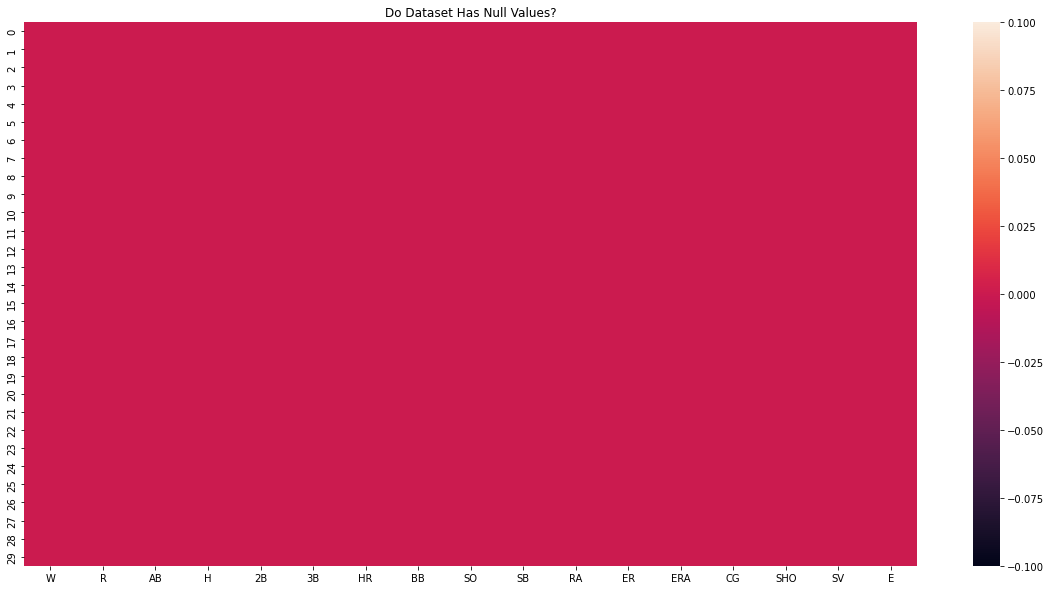

In [11]:
plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.title('Do Dataset Has Null Values?')
plt.show()

Observation: Dataset do not have any kind of null or missing values in it. 

In [12]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [15]:
df['W'].unique

<bound method Series.unique of 0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64>

<AxesSubplot:ylabel='count'>

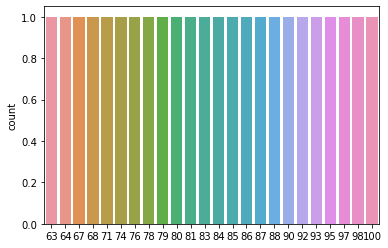

In [16]:
sns.countplot(df['W'].unique())

# Describing the dataset: 

In [17]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations from the table: 
    
    1. Each variables do have 30 data rows. 
    2. Standard deviation of each variables is quite high which means data do hold outliers keeping threshold 3 - It needs to be corrected. 
    3. As per the 50% median value and maximum value, data do shows it is not quite bell shaped and balanced. It will be explored further with exploratory data analysis part. 

In [19]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<AxesSubplot:ylabel='Density'>

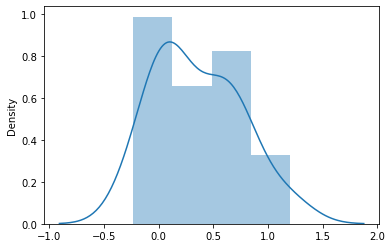

In [20]:
sns.distplot(df.skew())

Observation drawn from skewness graph - 

1. It do shows that data is not skewed keeping the threshold -3 to 3. Plus data is balanced and bell shaped. Rest of the things will be discovered further. 

In [22]:
## Checking correlation among the variables: 

df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

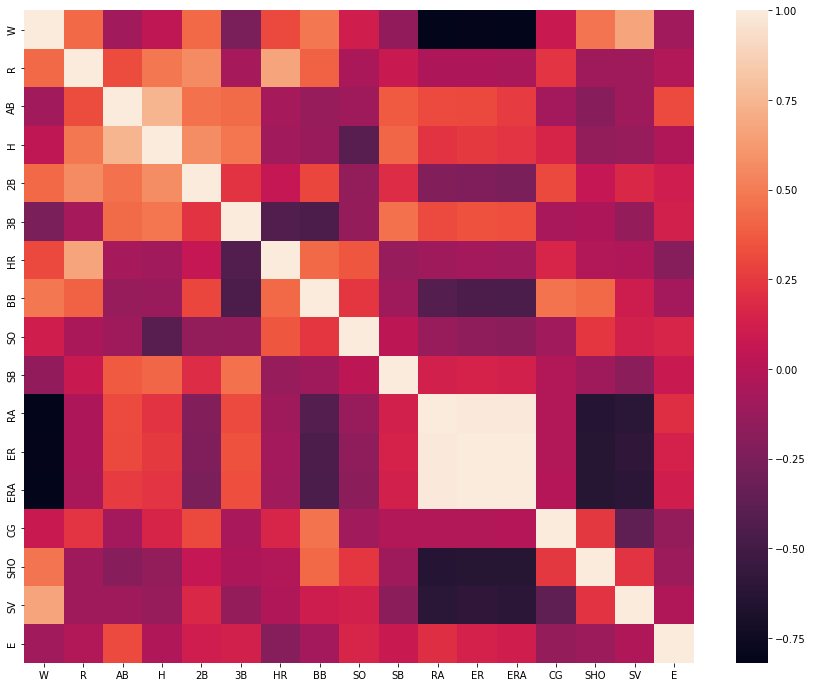

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr())

Observation: 
    
    1. All the varaibles are somewhere lightly or intensly correlated with each other. Specially RA, ER, ERA, CG, and E are highly positively correlated with output variables "wining". 
    2. Rest of the varaibles are lighlt coreleated with the output variables. 

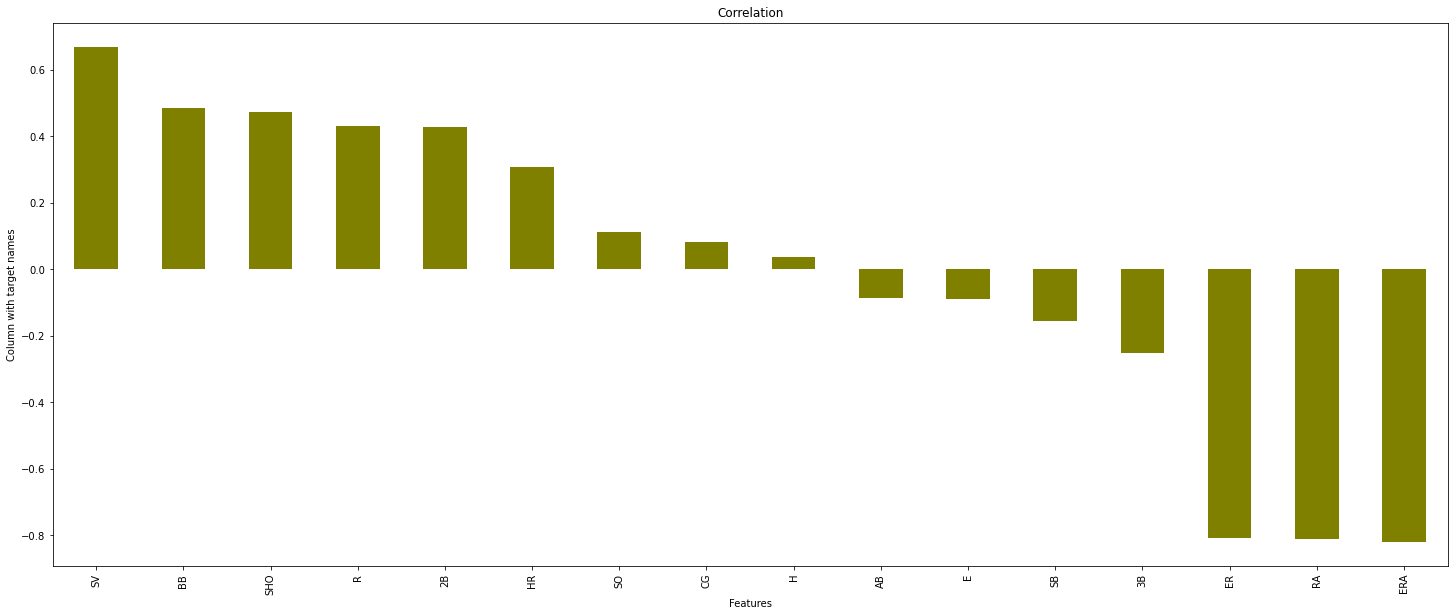

In [33]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='olive')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Observation: 
    
    SV is highly positivly correlated with output variable nad ERA is highly negatively correlated with output variable. 

# Data Visualization: 

<AxesSubplot:ylabel='Density'>

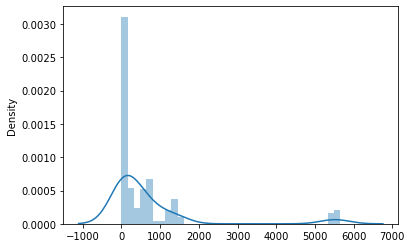

In [18]:
sns.distplot(df)

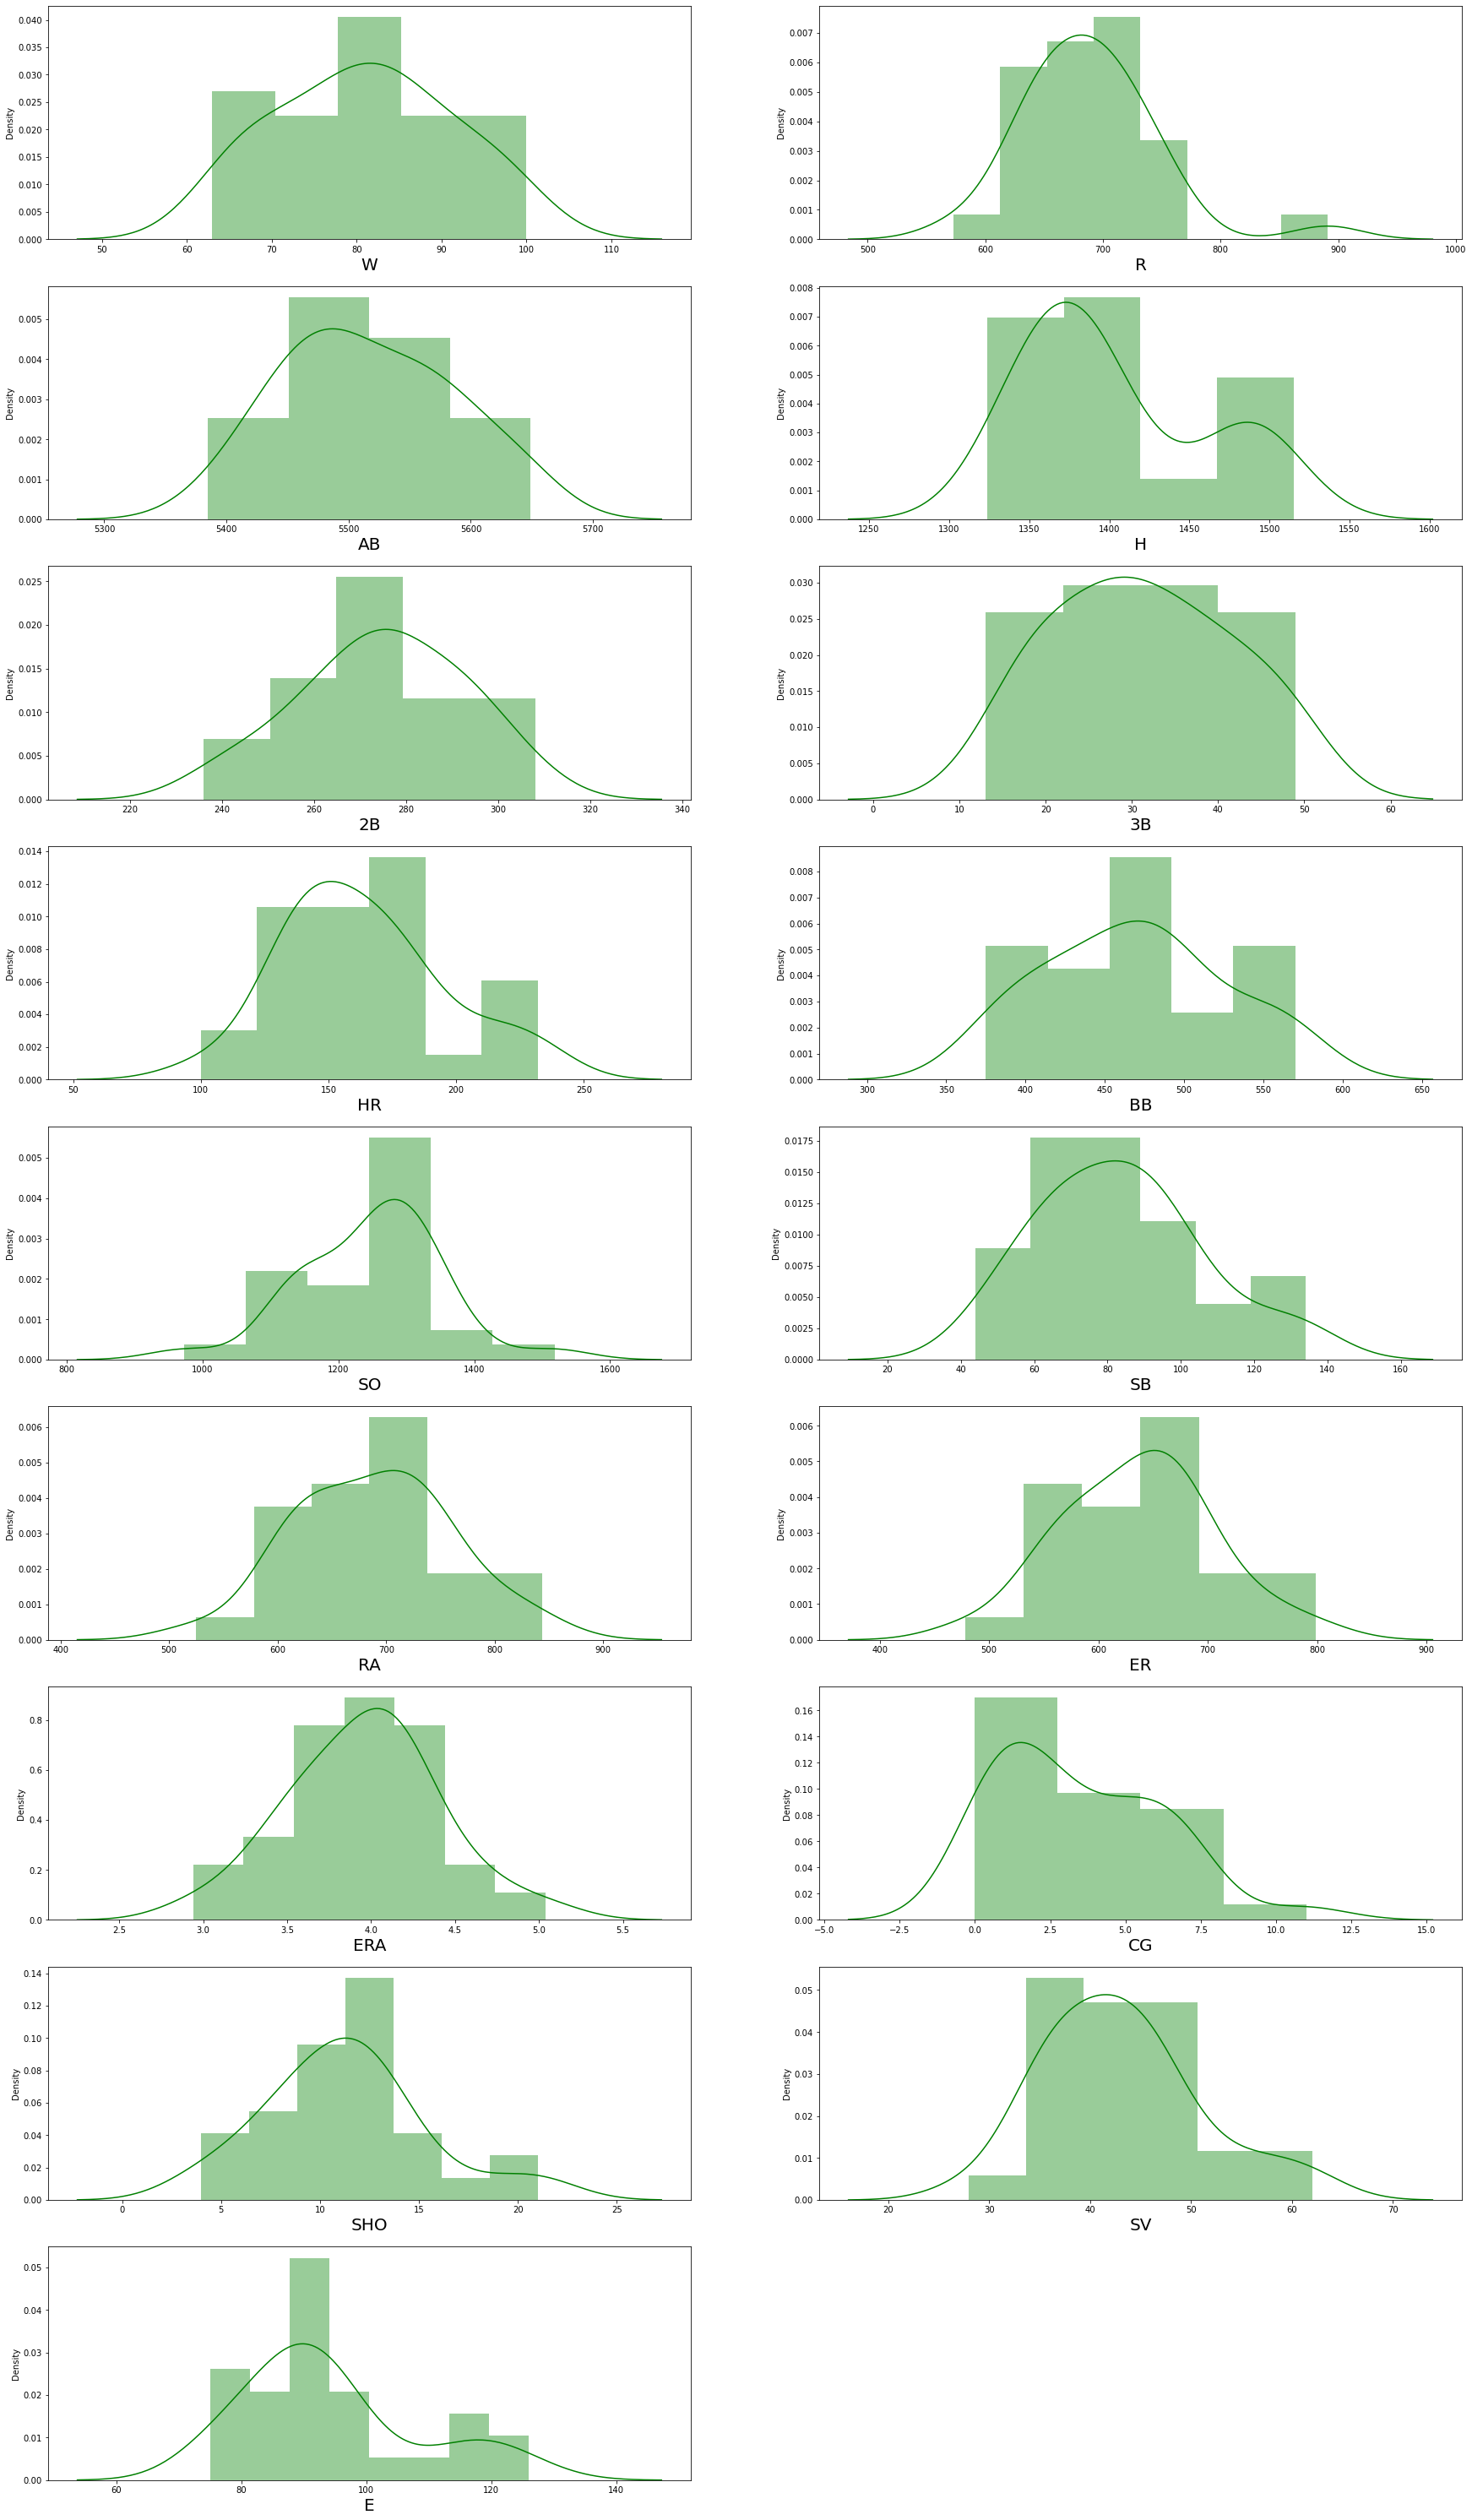

In [21]:
## Checking the data distribution with respect to each particular variables. 
plt.figure(figsize = (30,60), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Observation from the data distribution graphs: 
    
    1. On an aggregate, data is rightly skewed. In-dpeth, it is becuase of only certain variables - R, H, CG, and E. 
    2. Rest of the varaibles on the individual basis holds bell-shaped curve and gives out the well balanced distribution. 

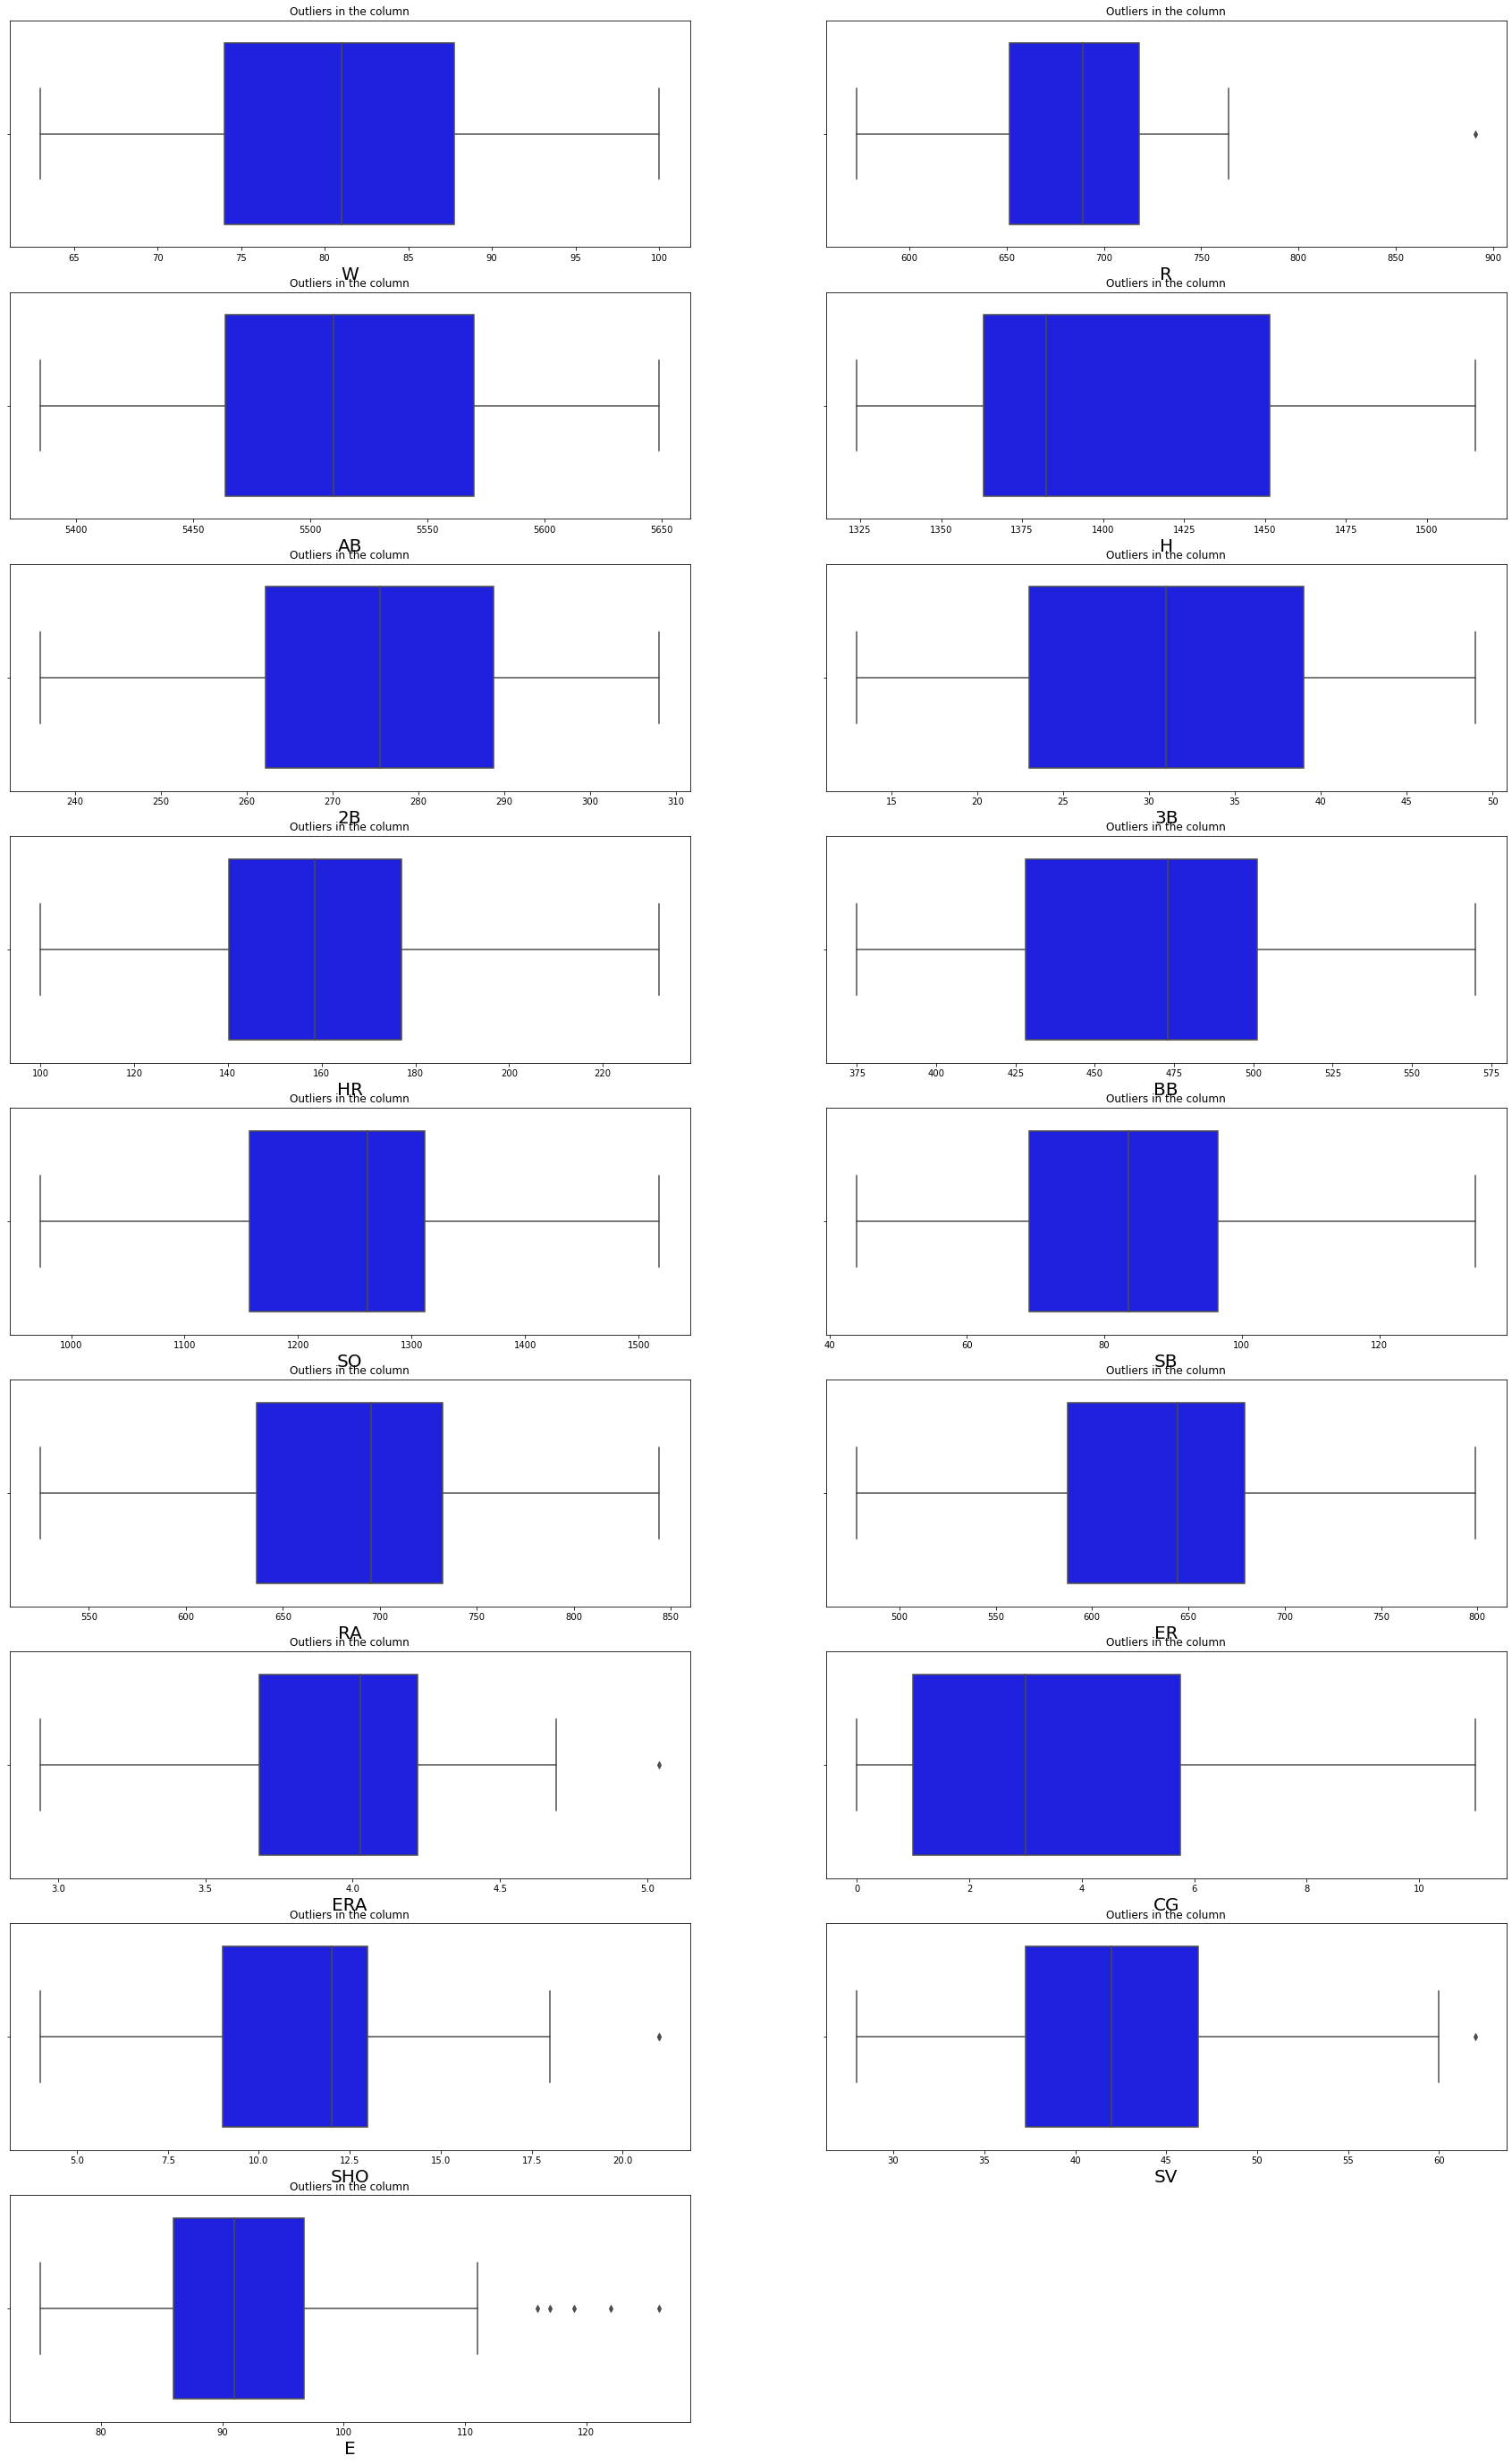

In [28]:
## Checking the outliers with respect to each input and output variables. 
plt.figure(figsize = (30,55), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        plt.title("Outliers in the column")
    plotnumber +=1
plt.show()

Observation: 
    
    Outliers do exsist in some variables. It inlcudes R, ERA, SHO, SV and E. We need to further remove it to make the training phase smooth. 

<Figure size 1800x1440 with 0 Axes>

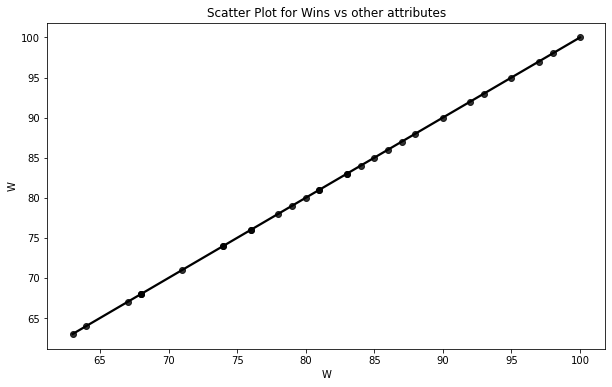

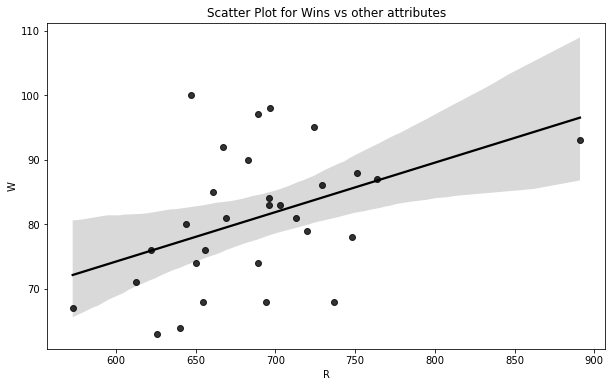

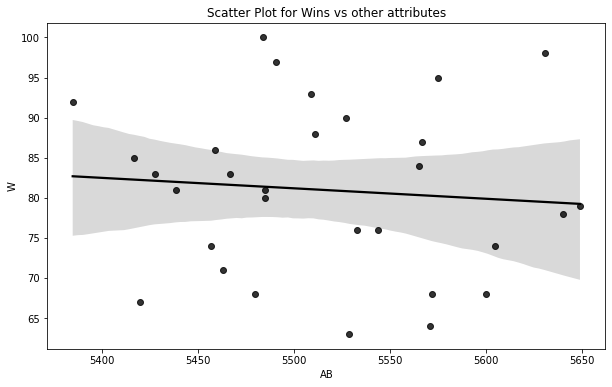

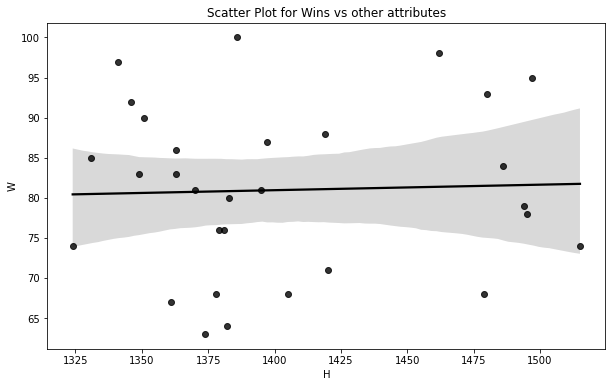

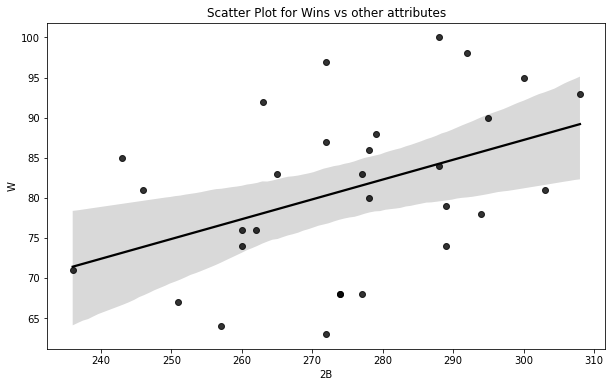

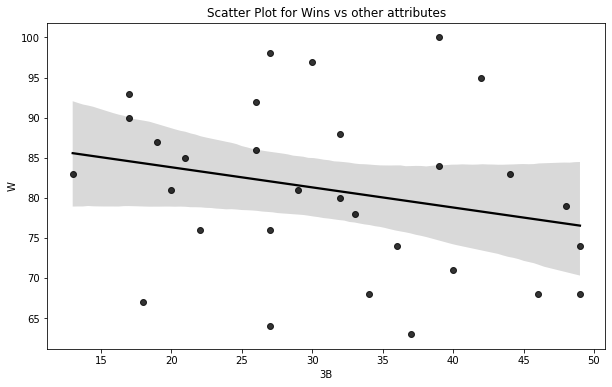

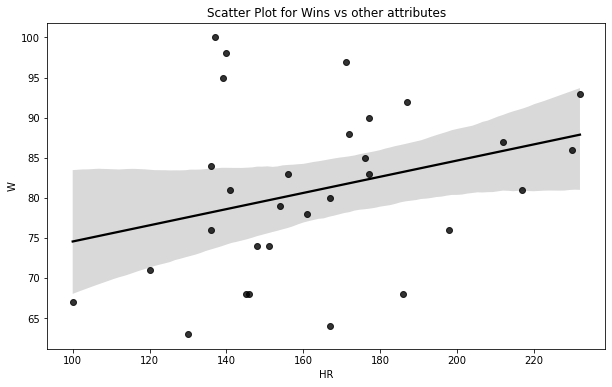

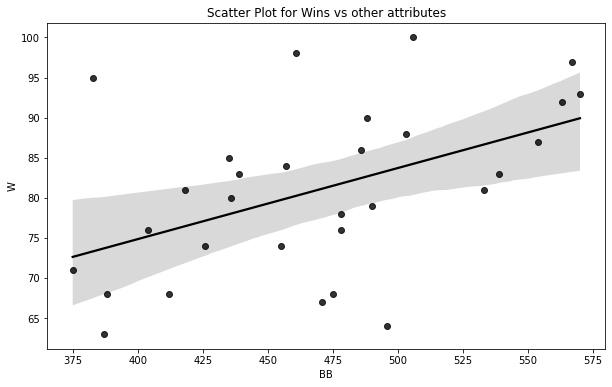

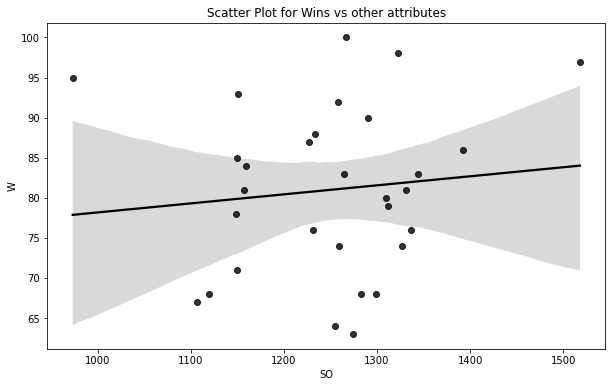

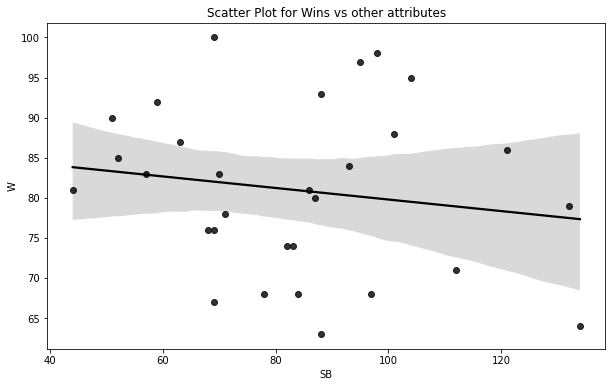

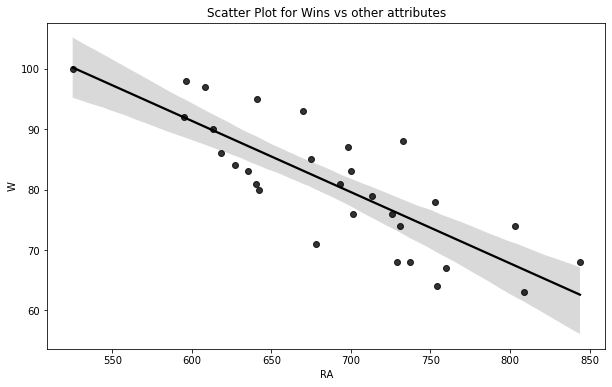

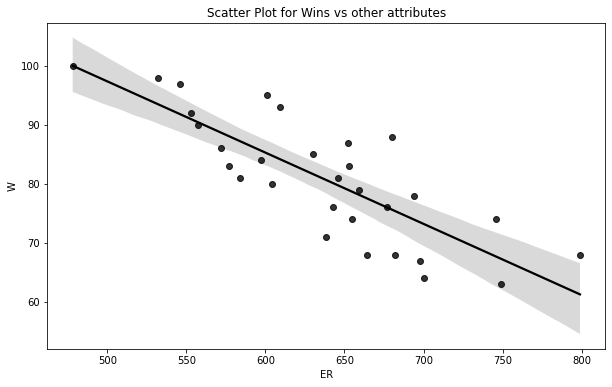

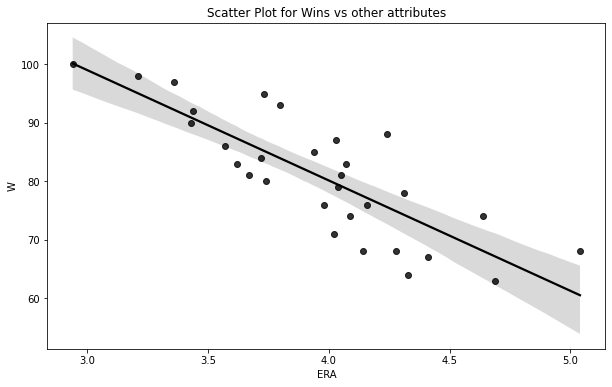

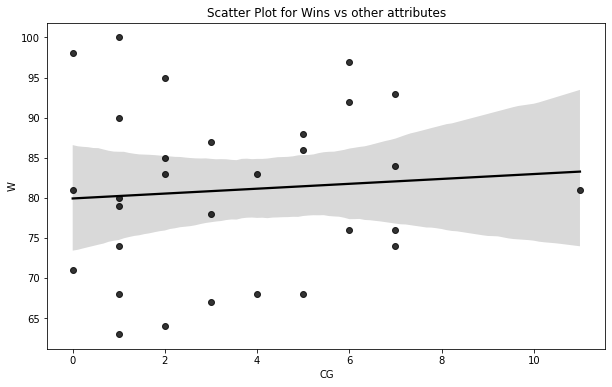

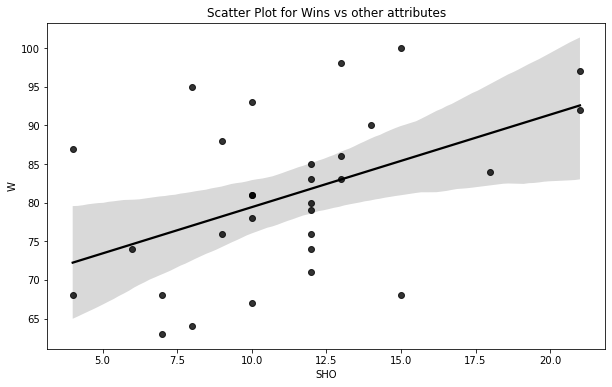

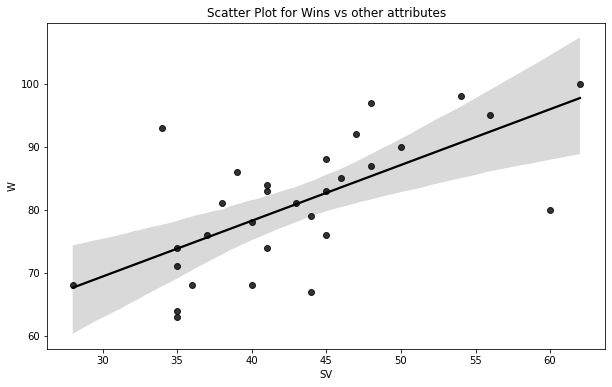

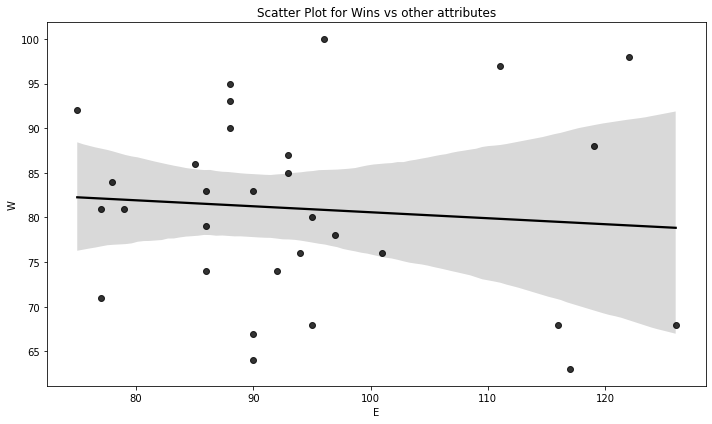

In [31]:
## Conducting the bivariate analysis. 
### Looking at the distrubution of data with respect to the output variables individually!
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'], color='black')
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

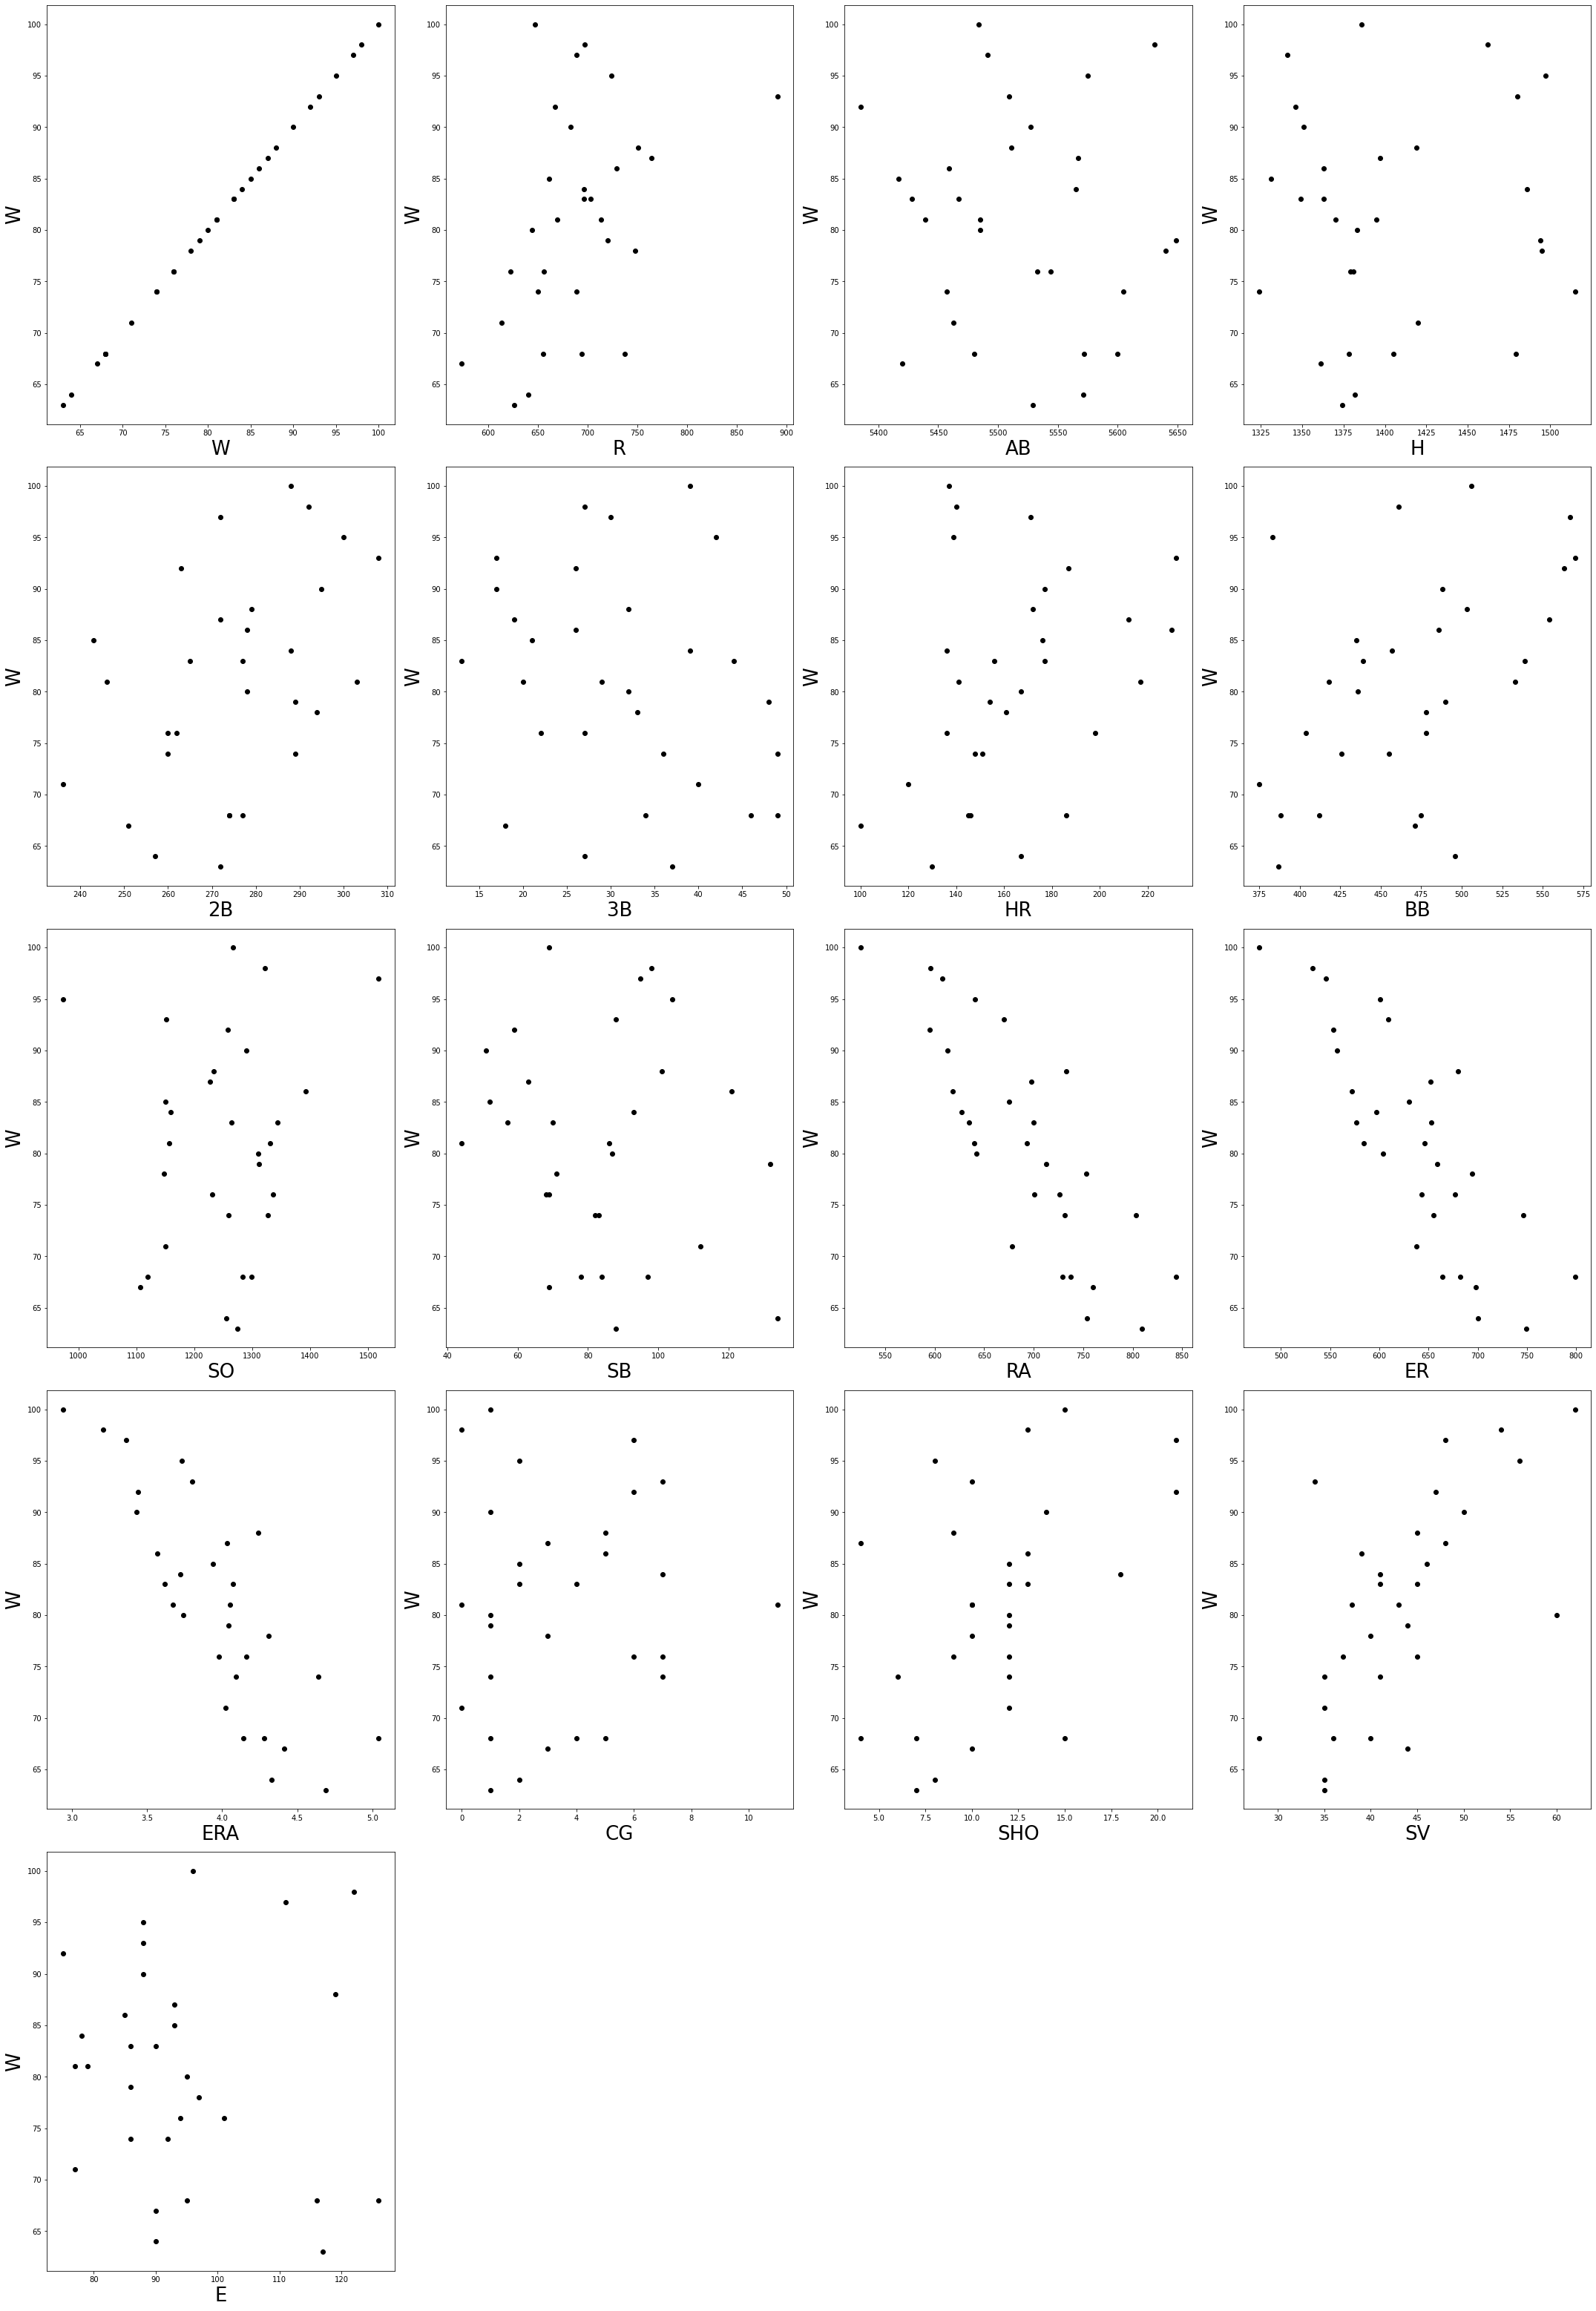

In [30]:
## Conducting the bivariate analysis. 
### Looking at the distrubution of data with respect to the output variables individually! 

plt.figure(figsize = (30,60), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='black')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()
    

Observations: 
    
    Variables like SV,ERA,SHO and R do hold the linear relationship with the output variables "W". Rest of the variables do have the scattered distribution and do hold the outliers within themselves as well. 
    

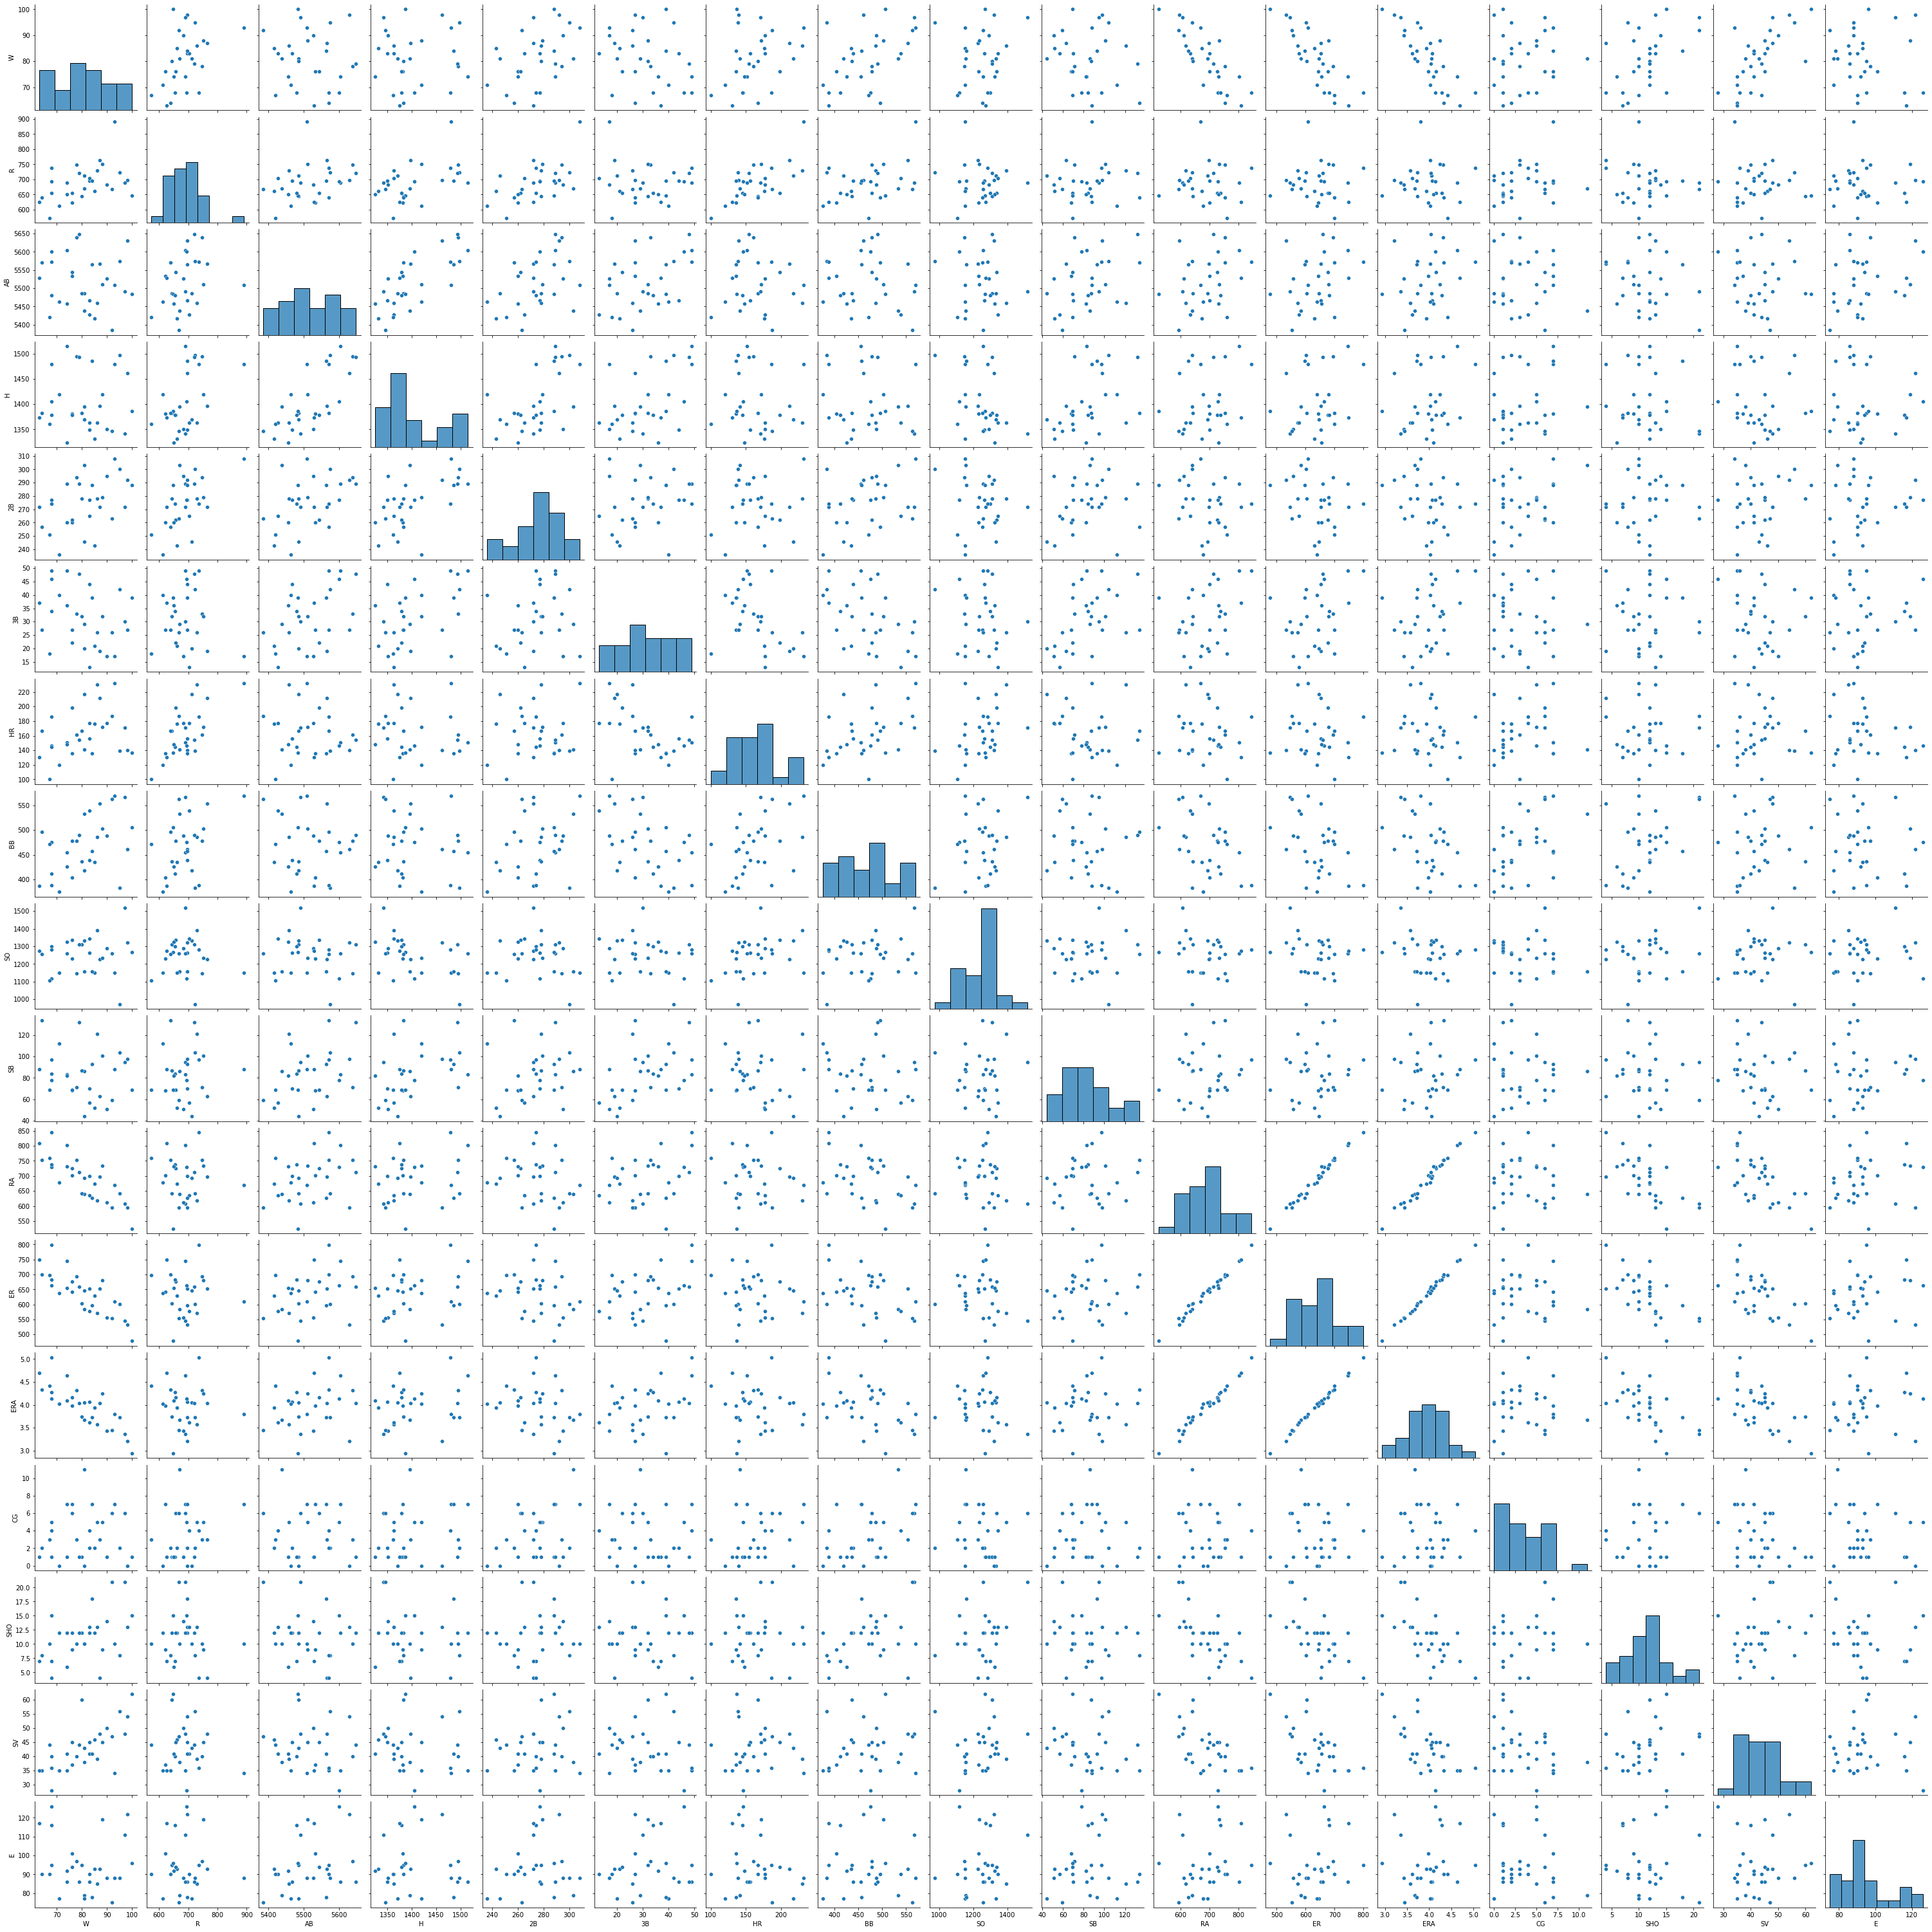

In [32]:
sns.pairplot(df)

<AxesSubplot:>

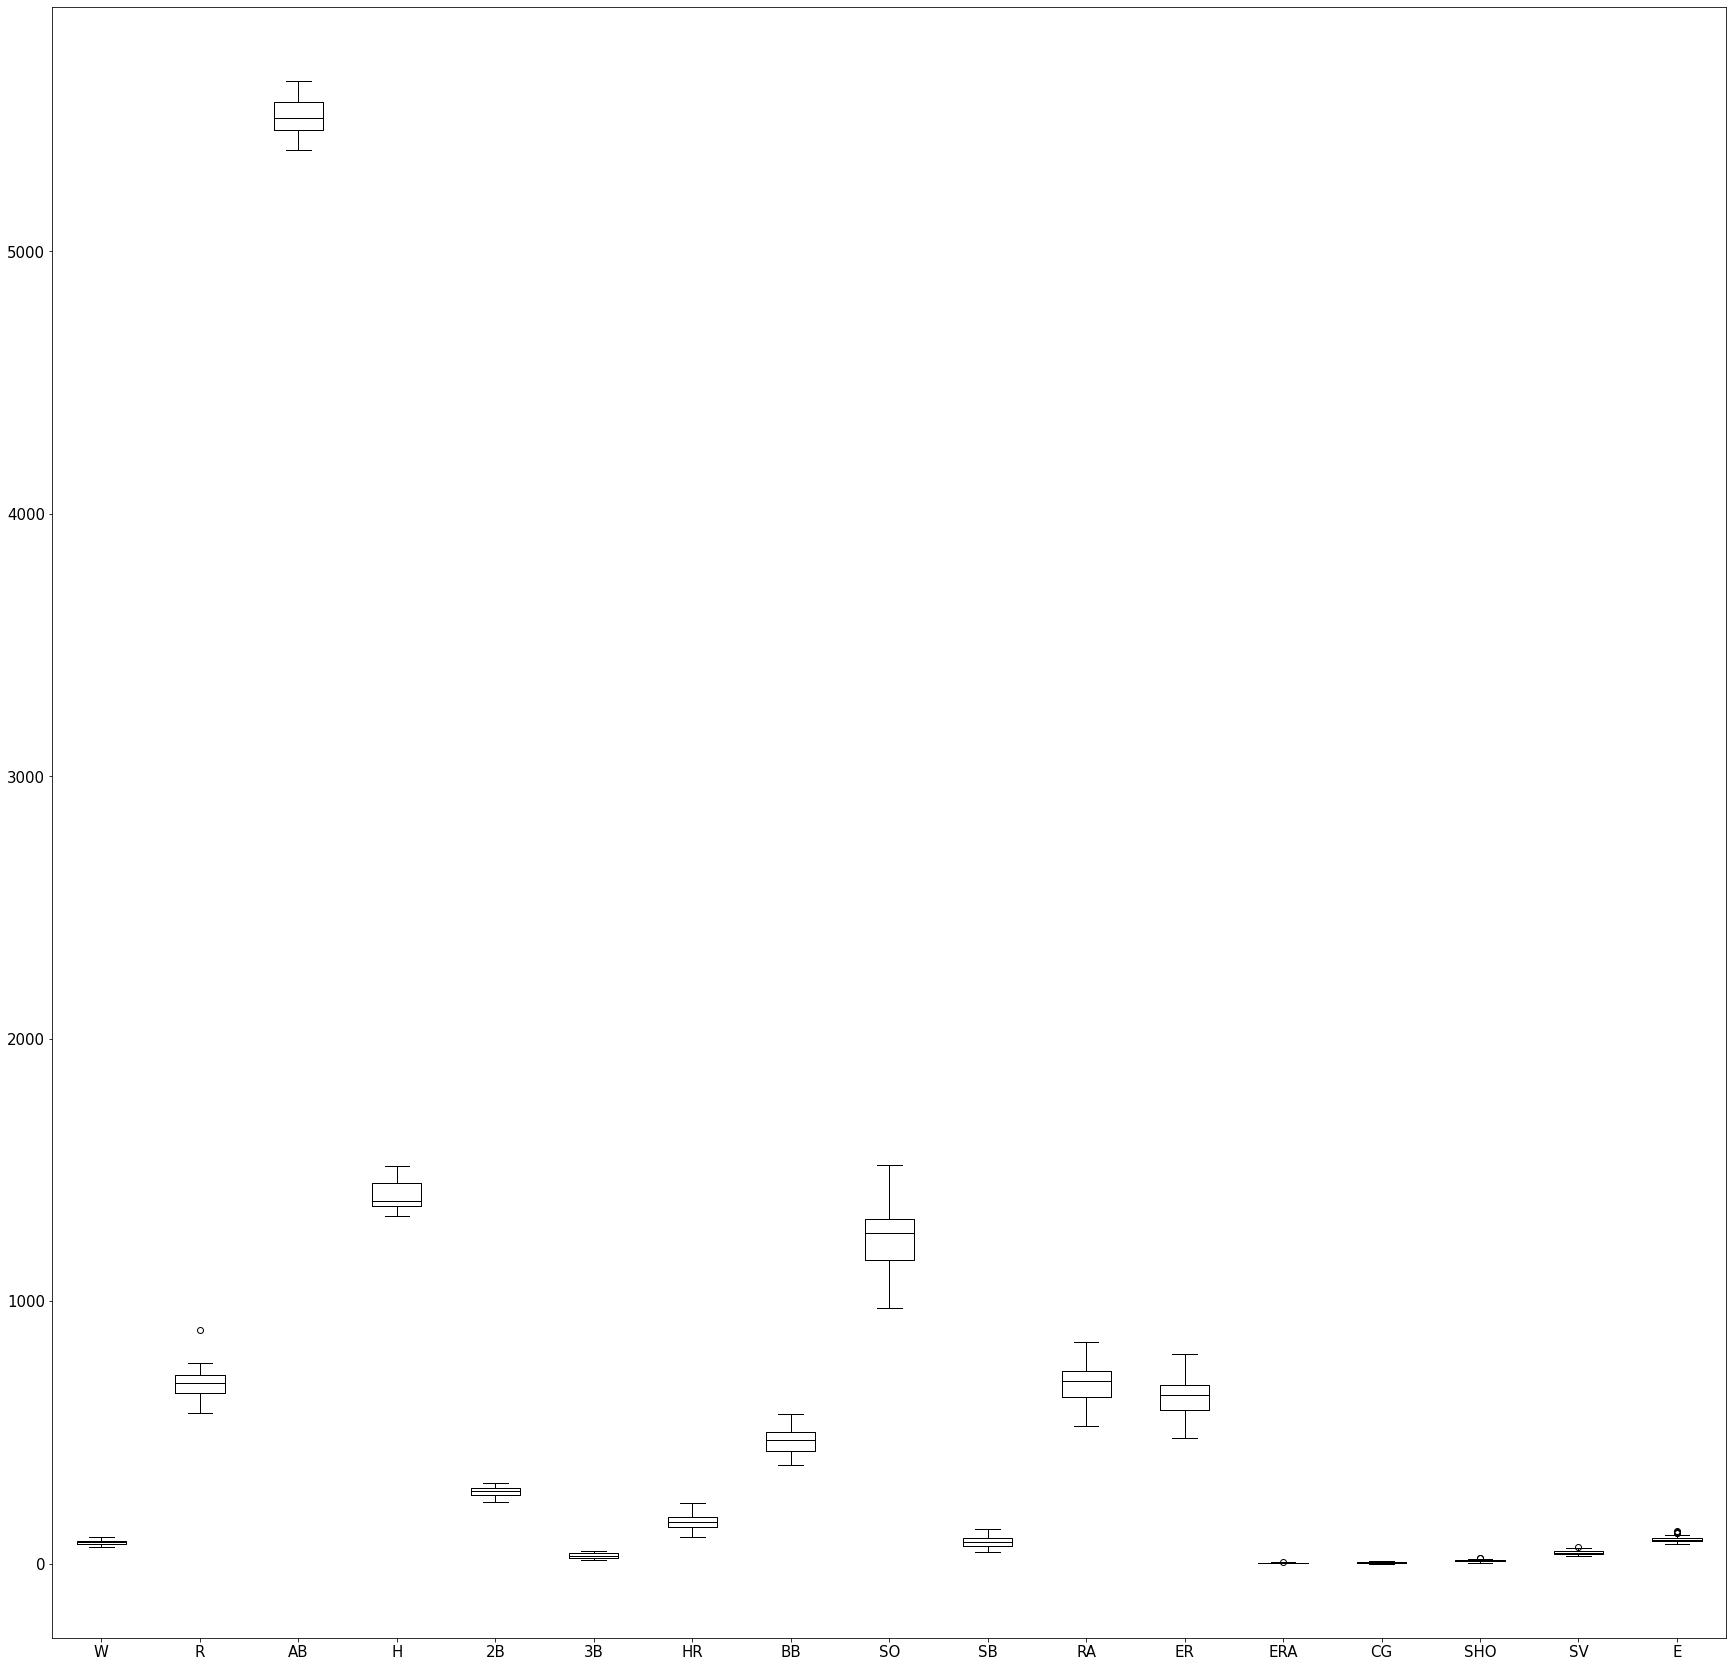

In [34]:
### Checking for the outliers in the distrbution with bivariate analysis. 
df.plot(kind='box',fontsize=15,figsize=(30,30),color='black')

Observations: 
    
    R-Runs,ERA-Earned Run average,SHO-Shutout,SV-Saves,E-Errors do have outliers value. We will remove it now. 

## Data Cleaning

In [35]:
from scipy.stats import zscore 
z = np.abs(zscore(df))

In [36]:
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [37]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(29, 17)

In [38]:
df = df_new

In [39]:
df.shape

(29, 17)

Observations: Outliers are removed from the dataset. 

In [40]:
### How much data we have losed after removing the outliers? 

Amount_Of_Dataloss = (((30-29)/30)*100)
print(Amount_Of_Dataloss)

3.3333333333333335


Observations: 
    
    In total we have removed only 3% of the data from the overall distribution. It is even less than 5% of the data which will not make that big distribution. 

In [42]:
from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')
df[['E','SHO','SV','CG']] = scale.fit_transform(df[['E','SHO','SV','CG']].values)

In [43]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

<AxesSubplot:ylabel='Density'>

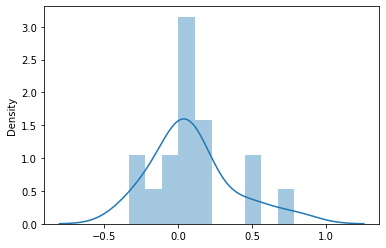

In [44]:
sns.distplot(df.skew())

Now the data is perfectly bell-shaped; skewness is removed from the variabbles E, SHO, SV, and SG. 

# Splitting the depenedent and indepenednt variables seperately : 

In [45]:
x = df.drop("W",axis=1)
y = df['W']

# Scaling the x-independent variables for more smooth training procedure: 

In [46]:
sc=StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [48]:
x = x1 

In [49]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.513555,0.312020,1.554265


# Conducting the variance inflation factor (VIF): 

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
v=pd.DataFrame()
v["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
v["Features"]=x.columns
v

,vif_Features,Features
0,7.163940,R
1,20.237194,AB
2,10.222302,H
3,3.529258,2B
4,3.224752,3B
5,8.735387,HR
6,3.344343,BB
7,2.810397,SO
8,1.958083,SB
9,199.364343,RA


 Multicollinearity do exsist in certain varaibles inlcuding RA, ER, and ERA. We can remove these variables. 

In [52]:
x = x.drop(["ER"],axis=1)

In [54]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,6.152855,R
1,7.695529,AB
2,9.404858,H
3,3.227266,2B
4,3.120866,3B
5,7.494317,HR
6,3.343931,BB
7,2.784915,SO
8,1.787842,SB
9,139.906628,RA


In [55]:
x = x.drop(["ERA"],axis=1)

In [56]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,6.109234,R
1,5.248909,AB
2,7.925770,H
3,3.165648,2B
4,2.981083,3B
5,6.238367,HR
6,3.073182,BB
7,2.284735,SO
8,1.771412,SB
9,4.797035,RA


Now there is no more multicollinerity available among the variables after removing the variable like ERA, and ER. 

# Making the training and testing data sepeartely now: 

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [58]:
x_train.shape

(22, 14)

In [59]:
x_test.shape

(7, 14)

In [60]:
y_train.shape

(22,)

In [61]:
y_test.shape

(7,)

# Building the model now: 

# Conducting the linear regression - 

In [62]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9297273563097905


In [63]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 30.76487208433079
MAE: 4.626096199559366
r2_score: 0.682143748230684


Linear regression is giving the R2 score 68%. 

# Conducting the SGD - 

In [65]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',mean_squared_error(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.781099518104403
mae: 29.69898782942712
mae: 4.5267135028133145
rmse: 5.4496777729905395


SGD gives out the R2 score 78%. 

# Conducting the lasso regression - 

In [66]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 1, 'random_state': 0}


In [67]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.8661502701270625
mse: 18.15985722847528
mae: 3.388058938415749
rmse: 4.261438399000422


Lasso regression gave R2 score 86%. 

# Conducting the Ridge Regression - 

In [68]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'lsqr'}


In [69]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.6929649645124349
mse: 41.65650848819047
mae: 5.599091491700177
rmse: 6.454185346594136


Ridge regression gave R2 score 69% only. 

# Performing The Cross Validation Now - 

In [70]:
np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 33.825071, 20.886457
R   : 27.604684, 18.791775
svr   : 26.101707, 16.405250
svr_p   : 98.664466, 74.416491
svr_r   : 97.822789, 70.051243
RF   : 42.705655, 26.930572
DTR   : 81.550000, 56.713610
GBR   : 53.111108, 33.940665


Linear Regession is selected as the final model here as per the cross validation. 

# Conducting the hyper parameter tuning - 

In [71]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [72]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [73]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [74]:
GVC.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 8,
 'selection': 'random',
 'tol': 100}

In [75]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test,pred)))

R2_Score: 51.618497045067926
mean_squared_error: 65.64086360089561
mean_absolute_error: 7.4834535297631595
RMSE value: 8.101904936550145


After tuning, R2 score is 51% only. 

# Saving the model now - 

In [77]:
import joblib
joblib.dump(Final_mod,"BaseBall.pkl")

['BaseBall.pkl']

# Performing certain predictions - 

In [78]:
model=joblib.load("Baseball.pkl")
prediction = model.predict(x_test)
prediction

array([79.89885978, 70.66805767, 86.4575884 , 82.0508121 , 80.37368126,
       86.09025978, 79.31202541])

In [79]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6
Predicted,79.89886,70.668058,86.457588,82.050812,80.373681,86.09026,79.312025
Original,67.00000,63.000000,97.000000,76.000000,83.000000,92.00000,86.000000


# The End! 